In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset from csv to pandas dataframe
data = pd.read_csv("Suicide_overview_1985_to_2016.csv")

In [91]:
# Data inspection and summary
# Display basic information about the dataset
print('/*This is basic data info*/')
print("\n\n")
print(data.info())

# Display summary statistics
print("\n\n")
print('/*This is data summary statistics*/')
print("\n\n")
print(data.describe())

# Display the first few rows of the dataset
print("\n\n")
print('/*First few rows of data*/')
print(data.head())

/*This is basic data info*/



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None



/*This is data summary statistics*/



               year   suicides_no    population  suicides/100k po

In [92]:
# Data filtering
# Filter data for Canada and Australia separately and make copies
canada_data = data[data['country'] == 'Canada'].copy()
australia_data = data[data['country'] == 'Australia'].copy()

print('/*This is Canada data*/')
print(canada_data.head(10))
print("\n\n")
print('/*This is data Australia data*/')
print(australia_data.head(10))

/*This is Canada data*/
     country  year     sex          age  suicides_no  population  \
4916  Canada  1985    male    75+ years          111      390200   
4917  Canada  1985    male  55-74 years          502     1841000   
4918  Canada  1985    male  25-34 years          605     2240500   
4919  Canada  1985    male  35-54 years          774     3046800   
4920  Canada  1985    male  15-24 years          560     2224600   
4921  Canada  1985  female  35-54 years          255     3025600   
4922  Canada  1985  female  55-74 years          166     2092200   
4923  Canada  1985  female  25-34 years          148     2257500   
4924  Canada  1985  female    75+ years           34      642900   
4925  Canada  1985  female  15-24 years           85     2143200   

      suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
4916              28.45   Canada1985         0.827    364,756,499,451   
4917              27.27   Canada1985         0.827    364,756,499,451   
4918    

In [93]:
# Data cleaning by fixing missing values
# Fill missing HDI values with mean values for Canada
canada_mean_hdi = canada_data['HDI for year'].mean()
canada_data.loc[:, 'HDI for year'].fillna(canada_mean_hdi, inplace=True)

# Fill missing HDI values with mean values for Australia
australia_mean_hdi = australia_data['HDI for year'].mean()
australia_data.loc[:, 'HDI for year'].fillna(australia_mean_hdi, inplace=True)

print('/*This is Canada data*/')
print(canada_data.head(10))
print("\n\n")
print('/*This is data Australia data*/')
print(australia_data.head(10))

/*This is Canada data*/
     country  year     sex          age  suicides_no  population  \
4916  Canada  1985    male    75+ years          111      390200   
4917  Canada  1985    male  55-74 years          502     1841000   
4918  Canada  1985    male  25-34 years          605     2240500   
4919  Canada  1985    male  35-54 years          774     3046800   
4920  Canada  1985    male  15-24 years          560     2224600   
4921  Canada  1985  female  35-54 years          255     3025600   
4922  Canada  1985  female  55-74 years          166     2092200   
4923  Canada  1985  female  25-34 years          148     2257500   
4924  Canada  1985  female    75+ years           34      642900   
4925  Canada  1985  female  15-24 years           85     2143200   

      suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
4916              28.45   Canada1985         0.827    364,756,499,451   
4917              27.27   Canada1985         0.827    364,756,499,451   
4918    

In [94]:
# Concatenate the filtered DataFrames back together
canada_aus_data = pd.concat([canada_data, australia_data])
print('/*This is Canada Australia joined data*/')
print('\n\n\n')
print(canada_aus_data.head(10))

/*This is Canada Australia joined data*/




     country  year     sex          age  suicides_no  population  \
4916  Canada  1985    male    75+ years          111      390200   
4917  Canada  1985    male  55-74 years          502     1841000   
4918  Canada  1985    male  25-34 years          605     2240500   
4919  Canada  1985    male  35-54 years          774     3046800   
4920  Canada  1985    male  15-24 years          560     2224600   
4921  Canada  1985  female  35-54 years          255     3025600   
4922  Canada  1985  female  55-74 years          166     2092200   
4923  Canada  1985  female  25-34 years          148     2257500   
4924  Canada  1985  female    75+ years           34      642900   
4925  Canada  1985  female  15-24 years           85     2143200   

      suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
4916              28.45   Canada1985         0.827    364,756,499,451   
4917              27.27   Canada1985         0.827    364,75

In [95]:
# Display summary statistics
canada_summary_stats = canada_data.describe()
print('Canada_summary_stats')
print(canada_summary_stats)

aus_summary_stats = australia_data.describe()
print("\n\n")
print('Australia_summary_stats')
print(aus_summary_stats)
print("\n\n")

comb_summary_stats = canada_aus_data.describe()
print('Combined_summary_stats')
print(comb_summary_stats)

Canada_summary_stats
              year  suicides_no    population  suicides/100k pop  \
count   348.000000   348.000000  3.480000e+02         348.000000   
mean   1999.000000   309.083333  2.373713e+06          12.467586   
std       8.378647   326.117439  1.135684e+06          10.031068   
min    1985.000000     4.000000  3.902000e+05           0.230000   
25%    1992.000000    73.250000  1.920817e+06           4.747500   
50%    1999.000000   161.500000  2.181016e+06           7.610000   
75%    2006.000000   466.500000  2.523110e+06          22.172500   
max    2013.000000  1442.000000  5.088099e+06          36.260000   

       HDI for year  gdp_per_capita ($)  
count    348.000000          348.000000  
mean       0.881111        30887.482759  
std        0.016347        12627.213800  
min        0.827000        15522.000000  
25%        0.881111        22268.000000  
50%        0.881111        24041.000000  
75%        0.881111        42566.000000  
max        0.912000        553

In [96]:
# Data manipulation

# Print all column names to identify the exact column name
print(canada_data.columns)
print("\n\n")
print(australia_data.columns)
print("\n\n")

# Rename the column to remove extra whitespaces
canada_data.rename(columns={'gdp_per_capita ($)': 'gdp_per_captia_USdollars'}, inplace=True)
australia_data.rename(columns={'gdp_per_capita ($)': 'gdp_per_captia_USdollars'}, inplace=True)

# Select the "gdp_per_captia_USdollars" column for inspection
canada_gdp_per_capita_column = canada_data["gdp_per_captia_USdollars"]
australia_gdp_per_capita_column = australia_data["gdp_per_captia_USdollars"]

# Data Inspection for Unexpected Characters, Missing Values, and Anomalies
# Check for missing values
missing_values = canada_gdp_per_capita_column.isnull().sum()
print("\n\n")
print("Number of Missing Values in canada_data:", missing_values)
print("\n\n")

missing_values = australia_gdp_per_capita_column.isnull().sum()
print("\n\n")
print("Number of Missing Values in australia_data:", missing_values)
print("\n\n")

# Convert the column to string
canada_gdp_per_capita_column = gdp_per_capita_column.astype(str)
australia_gdp_per_capita_column = gdp_per_capita_column.astype(str)

# Check for unexpected characters or non-numeric values
ca_unexpected_characters = canada_gdp_per_capita_column[~canada_gdp_per_capita_column.str.replace(',', '').str.isnumeric()]
if not ca_unexpected_characters.empty:
    print("\n\n")
    print("\nUnexpected Characters or Non-Numeric Values:")
    print(ca_unexpected_characters)
    print("\n\n")
    
au_unexpected_characters = australia_gdp_per_capita_column[~australia_gdp_per_capita_column.str.replace(',', '').str.isnumeric()]
if not au_unexpected_characters.empty:
    print("\n\n")
    print("\nUnexpected Characters or Non-Numeric Values:")
    print(au_unexpected_characters)
    print("\n\n")

# Check for unique values and their counts
ca_unique_values = canada_gdp_per_capita_column.value_counts()
print("\n\n")
print("\nUnique Values and Their Counts:")
print(ca_unique_values)
print("\n\n")

au_unique_values = australia_gdp_per_capita_column.value_counts()
print("\n\n")
print("\nUnique Values and Their Counts:")
print(au_unique_values)
print("\n\n")

# Choose a scaling factor based on your desired range
scaling_factor = 0.001  # Adjust this as needed

# Scale down the values
canada_scaled_gdp_per_capita = canada_gdp_per_capita_column.astype(float) * scaling_factor
australia_scaled_gdp_per_capita = australia_gdp_per_capita_column.astype(float) * scaling_factor

# Replace the original column with the scaled values
canada_data["gdp_per_captia_USdollars"] = canada_scaled_gdp_per_capita
australia_data["gdp_per_captia_USdollars"] = australia_scaled_gdp_per_capita

# Save the modified DataFrame to a new CSV file
canada_data.to_csv("canada_scaled.csv", index=False)
australia_data.to_csv("australia_scaled.csv", index=False)

# Pivoting based on year, generation and sex
canada_data_pivot = canada_data.pivot_table(index=['year', 'generation', 'sex'],
                                       columns='age', values='suicides_no', aggfunc='sum', fill_value=0)
australia_data_pivot = australia_data.pivot_table(index=['year', 'generation', 'sex'],
                                             columns='age', values='suicides_no', aggfunc='sum', fill_value=0)

# Adding new columns to substitute non-integer values to integers for sex, age-group and generation
# Define the mapping dictionaries
sex_mapping = {'male': 0, 'female': 1}
age_mapping = {
    '5-14 years': 0,
    '15-24 years': 1,
    '25-34 years': 2,
    '35-54 years': 3,
    '55-74 years': 4,
    '75+ years': 5
}
generation_mapping = {
    'G.I. Generation': 0,
    'Silent': 1,
    'Boomers': 2,
    'Generation X': 3,
    'Millenials': 4
}

# Apply the mappings to create new variables
canada_data['sex_mapped'] = canada_data['sex'].map(sex_mapping)
canada_data['age_mapped'] = canada_data['age'].map(age_mapping)
canada_data['generation_mapped'] = canada_data['generation'].map(generation_mapping)

australia_data['sex_mapped'] = australia_data['sex'].map(sex_mapping)
australia_data['age_mapped'] = australia_data['age'].map(age_mapping)
australia_data['generation_mapped'] = australia_data['generation'].map(generation_mapping)

# Group data by year, generation for later use
canada_grouped = canada_data.groupby(['year', 'generation', 'sex'])[['suicides/100k pop', 'gdp_per_captia_USdollars']].mean().reset_index()
australia_grouped = australia_data.groupby(['year', 'generation', 'sex'])[['suicides/100k pop', 'gdp_per_captia_USdollars']].mean().reset_index()

print('Canada_data after scaling, pivoting, and substitution')
print(canada_data.head(10))
print("\n\n")
print('Australia_data after scaling, pivoting, and substitution')
print(australia_data.head(10))
print("\n\n")

print('Canada_grouped')
print(canada_grouped.head(10))
print("\n\n")

print("\n\n")
print('Australia_grouped')
print(australia_grouped.head(10))
print("\n\n")

# Save canada_data to a CSV file
canada_data.to_csv('canada_data.csv', index=False)

# Save australia_data to a CSV file
australia_data.to_csv('australia_data.csv', index=False)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')



Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')






Number of Missing Values in canada_data: 0






Number of Missing Values in australia_data: 0







Unique Values and Their Counts:
2303     36
1299     36
4104     36
1698     24
939      24
         ..
62484    10
46976    10
15742    10
12905    10
48108    10
Name: gdp_per_capita ($), Length: 2233, dtype: int64







Unique Values and Their Counts:
2303     36
1299     36
4104     36
1698     24
939      24
         ..
62484    10
46976    10
15742    10
12905    10
48108    10
Name: gdp_per_capita ($), Length: 2233, dtype: int64



Canada_data

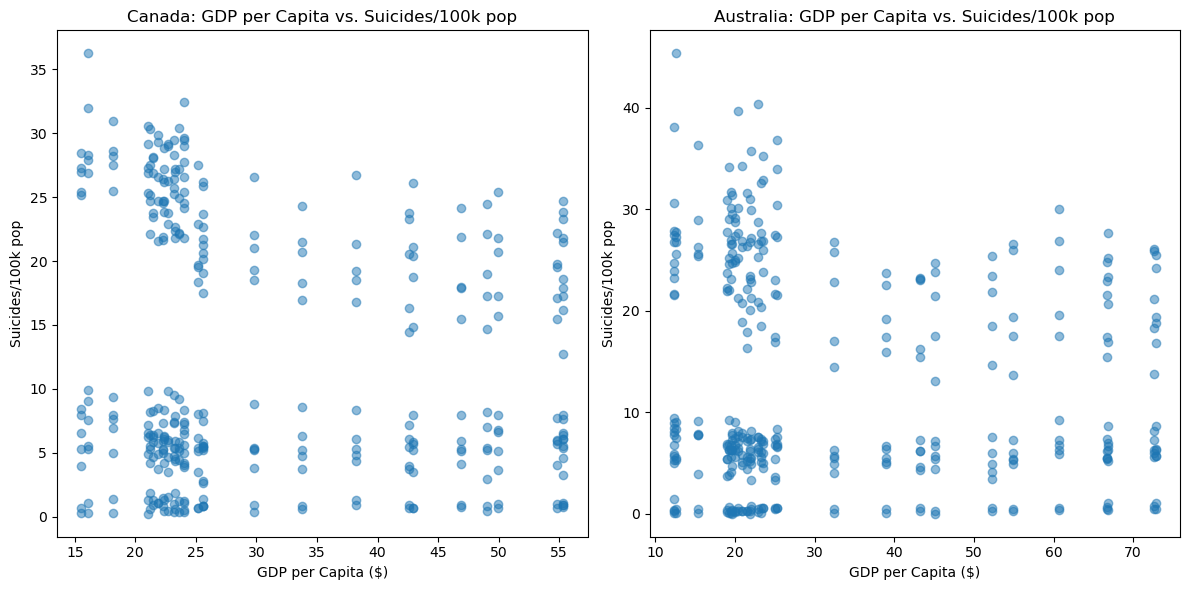

In [97]:
# Create scatter plots for 'suicides/100k pop' vs. 'gdp_per_captia_USdollars'
plt.figure(figsize=(12, 6))

# Canada Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(canada_data['gdp_per_captia_USdollars'], canada_data['suicides/100k pop'], alpha=0.5)
plt.title('Canada: GDP per Capita vs. Suicides/100k pop')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides/100k pop')

# Australia Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(australia_data['gdp_per_captia_USdollars'], australia_data['suicides/100k pop'], alpha=0.5)
plt.title('Australia: GDP per Capita vs. Suicides/100k pop')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides/100k pop')

plt.tight_layout()
plt.show()

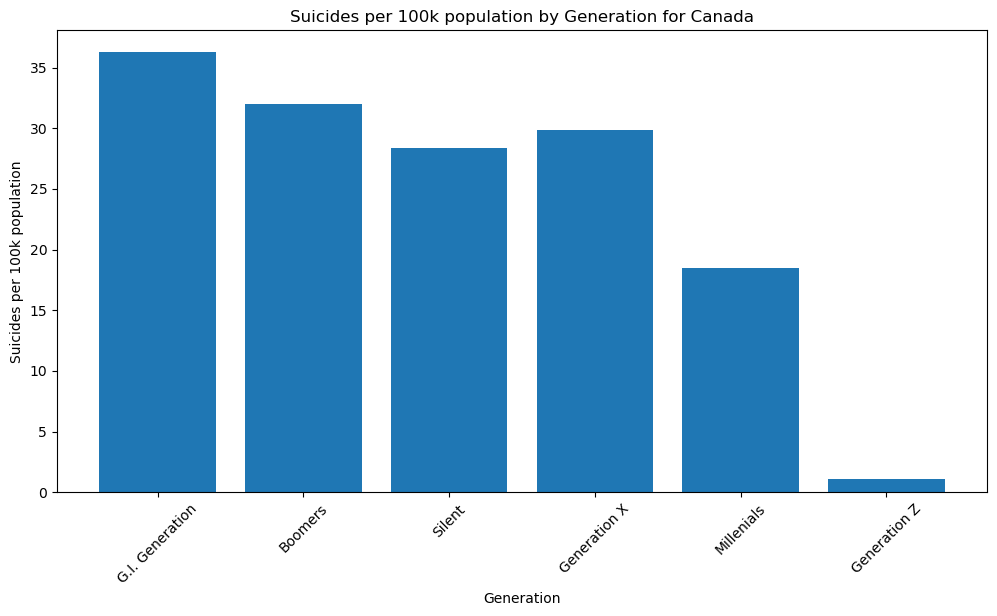

In [98]:
# Data distribution and visualization
plt.figure(figsize=(12, 6))

# Bar chart for suicides per 100k population by generation for Canada
plt.bar(canada_data['generation'], canada_data['suicides/100k pop'])
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k population')
plt.title('Suicides per 100k population by Generation for Canada')
plt.xticks(rotation=45)
plt.show()

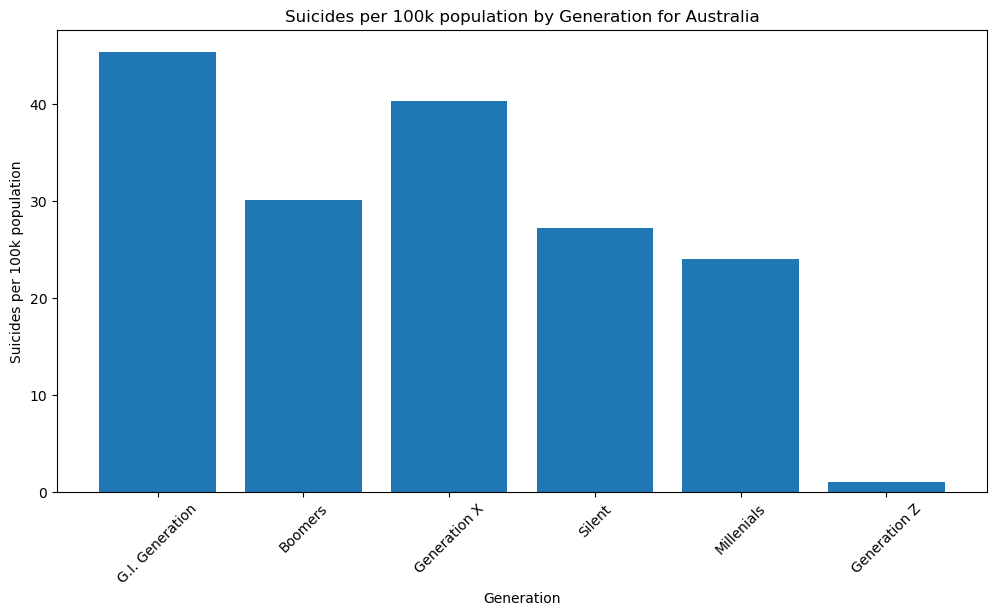

In [99]:
# Bar chart for suicides per 100k population by generation for Australia
plt.figure(figsize=(12, 6))
plt.bar(australia_data['generation'], australia_data['suicides/100k pop'])
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k population')
plt.title('Suicides per 100k population by Generation for Australia')
plt.xticks(rotation=45)
plt.show()

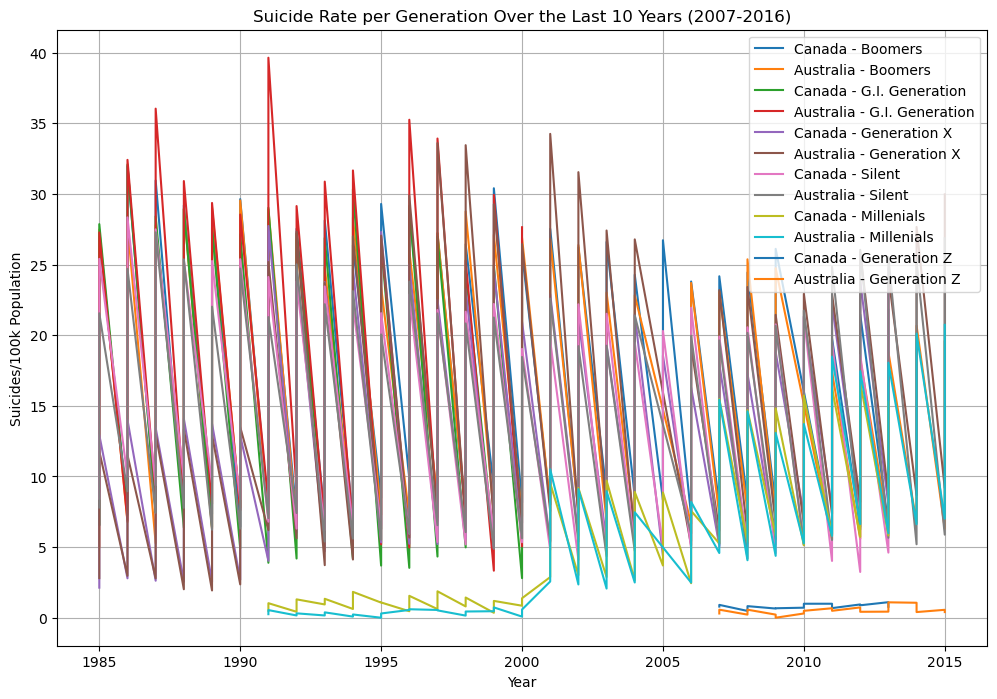

In [100]:
# Suicide rate per generation over last 10 years in Canada vs Australia
# Line plots for each generation
generations = canada_grouped['generation'].unique()

plt.figure(figsize=(12, 8))

for generation in generations:
    canada_gen_data = canada_grouped[canada_grouped['generation'] == generation]
    australia_gen_data = australia_grouped[australia_grouped['generation'] == generation]
    
    plt.plot(canada_gen_data['year'], canada_gen_data['suicides/100k pop'], label=f'Canada - {generation}')
    plt.plot(australia_gen_data['year'], australia_gen_data['suicides/100k pop'], label=f'Australia - {generation}')

plt.title('Suicide Rate per Generation Over the Last 10 Years (2007-2016)')
plt.xlabel('Year')
plt.ylabel('Suicides/100k Population')
plt.legend()
plt.grid(True)
plt.show()

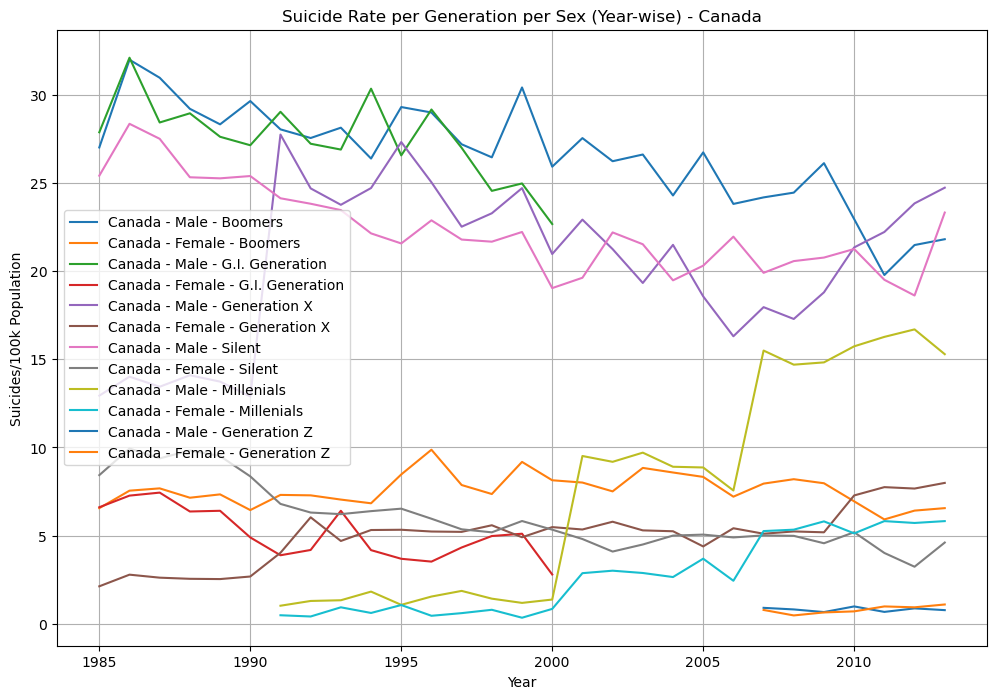

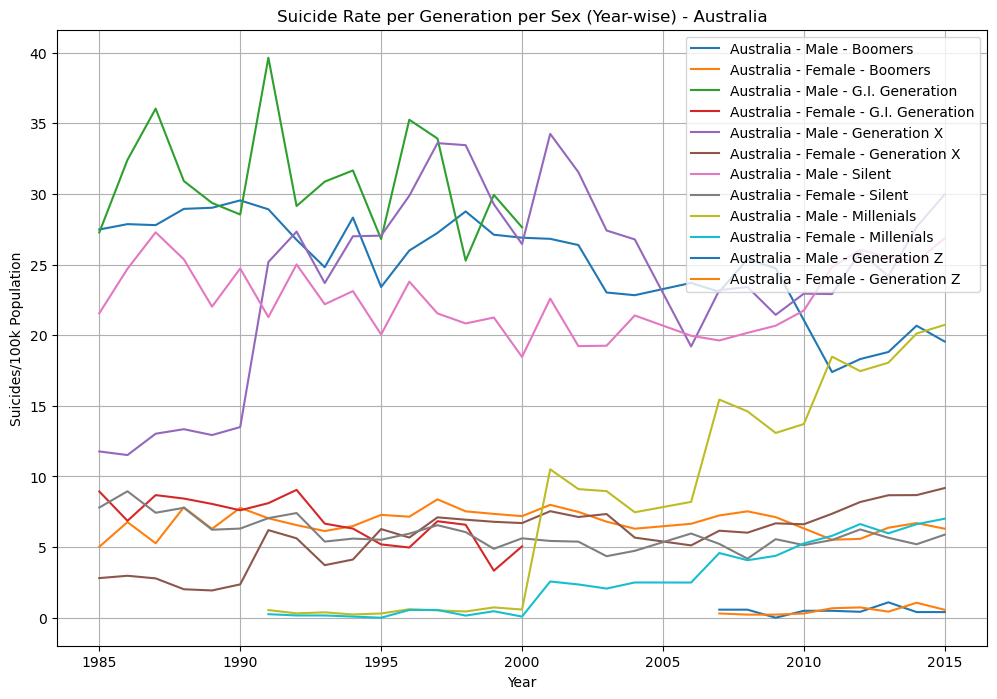

In [101]:
# This code separates the data for Canada and Australia, groups each dataset by year, generation, and sex, calculates the mean suicide rate for each group, and then creates
# line plots to visualize the trends in suicide rates for each combination of generation and sex for both countries.

# Get unique generations
unique_generations = canada_grouped['generation'].unique()

# Create line plots for each combination of generation and sex for Canada
plt.figure(figsize=(12, 8))

for generation in unique_generations:
    for sex in ['male', 'female']:
        canada_gen_sex_data = canada_grouped[(canada_grouped['generation'] == generation) & (canada_grouped['sex'] == sex)]
        plt.plot(canada_gen_sex_data['year'], canada_gen_sex_data['suicides/100k pop'], label=f'Canada - {sex.capitalize()} - {generation}')

plt.title('Suicide Rate per Generation per Sex (Year-wise) - Canada')
plt.xlabel('Year')
plt.ylabel('Suicides/100k Population')
plt.legend()
plt.grid(True)
plt.show()

# Create line plots for each combination of generation and sex for Australia
plt.figure(figsize=(12, 8))

for generation in unique_generations:
    for sex in ['male', 'female']:
        australia_gen_sex_data = australia_grouped[(australia_grouped['generation'] == generation) & (australia_grouped['sex'] == sex)]
        plt.plot(australia_gen_sex_data['year'], australia_gen_sex_data['suicides/100k pop'], label=f'Australia - {sex.capitalize()} - {generation}')

plt.title('Suicide Rate per Generation per Sex (Year-wise) - Australia')
plt.xlabel('Year')
plt.ylabel('Suicides/100k Population')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# Data modelling # 1
# Statistical model based on canada_data and australia_data b/w keys "suicides/100k pop" and "gdp_per_captia_USdollars" using statsmodels.api and model should be OLS

# Canada Data Model
X_canada = canada_data['gdp_per_captia_USdollars']
y_canada = canada_data['suicides/100k pop']

# Add a constant term to the independent variable (intercept)
X_canada = sm.add_constant(X_canada)

# Fit the OLS regression model for Canada
model_canada = sm.OLS(y_canada, X_canada).fit()

# Print the model summary for Canada
print("Canada Data Model Summary:")
print(model_canada.summary())

# Australia Data Model
X_australia = australia_data['gdp_per_captia_USdollars']
y_australia = australia_data['suicides/100k pop']

# Add a constant term to the independent variable (intercept)
X_australia = sm.add_constant(X_australia)

# Fit the OLS regression model for Australia
model_australia = sm.OLS(y_australia, X_australia).fit()

# Print the model summary for Australia
print("\nAustralia Data Model Summary:")
print(model_australia.summary())

Canada Data Model Summary:
                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.799
Date:                Fri, 08 Sep 2023   Prob (F-statistic):             0.0166
Time:                        15:26:55   Log-Likelihood:                -1292.8
No. Observations:                 348   AIC:                             2590.
Df Residuals:                     346   BIC:                             2597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [109]:
# Data modelling # 2 # second regression model
# Multivariate statistical model based on canada_data and australia_data b/w keys "suicides/100k pop" on y axis and "gdp_per_captia_USdollars" and "age_mapped" on x axis using statsmodels.api

import statsmodels.api as sm

# Model for Canada
X_canada = canada_data[['gdp_per_captia_USdollars', 'age_mapped']]
X_canada = sm.add_constant(X_canada)  # Add a constant term (intercept)
y_canada = canada_data['suicides/100k pop']

model_canada = sm.OLS(y_canada, X_canada).fit()

# Model for Australia
X_australia = australia_data[['gdp_per_captia_USdollars', 'age_mapped']]
X_australia = sm.add_constant(X_australia)  # Add a constant term (intercept)
y_australia = australia_data['suicides/100k pop']

model_australia = sm.OLS(y_australia, X_australia).fit()

# Print the model summaries
print("Canada Data Model Summary:")
print(model_canada.summary())

print("Australia Data Model Summary:")
print(model_australia.summary())

Canada Data Model Summary:
                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     31.37
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           3.03e-13
Time:                        15:32:39   Log-Likelihood:                -1266.6
No. Observations:                 348   AIC:                             2539.
Df Residuals:                     345   BIC:                             2551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [111]:
# Data modelling # 3 # third regression model
# Multivariate statistical model based on canada_data and australia_data b/w keys "suicides/100k pop" on y axis and "gdp_per_captia_USdollars" and "sex_mapped" and "age_mapped" on x axis using statsmodels.api

import statsmodels.api as sm

# Model for Canada
X_canada = canada_data[['gdp_per_captia_USdollars', 'sex_mapped', 'age_mapped']]
X_canada = sm.add_constant(X_canada)  # Add a constant term (intercept)
y_canada = canada_data['suicides/100k pop']

model_canada = sm.OLS(y_canada, X_canada).fit()

# Model for Australia
X_australia = australia_data[['gdp_per_captia_USdollars', 'sex_mapped', 'age_mapped']]
X_australia = sm.add_constant(X_australia)  # Add a constant term (intercept)
y_australia = australia_data['suicides/100k pop']

model_australia = sm.OLS(y_australia, X_australia).fit()

# Print the model summaries
print("Canada Data Model Summary:")
print(model_canada.summary())

print("Australia Data Model Summary:")
print(model_australia.summary())

Canada Data Model Summary:
                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     258.8
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.70e-88
Time:                        15:37:12   Log-Likelihood:                -1090.2
No. Observations:                 348   AIC:                             2188.
Df Residuals:                     344   BIC:                             2204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [103]:
# In this code:
# We load the dataset and filter it for Canada's data.
# We visualize the time series data to get an initial understanding of the suicide rate trends.
# We perform outlier detection using the Z-score method. The threshold (set to 3 in this example) determines how extreme a value needs to be to be considered an 
# outlier. You can adjust the threshold based on your analysis.
# Detected outliers are plotted on the graph to visualize their positions.
# The years with detected outliers are printed at the end.

# Extract suicide rate data
suicide_rate = canada_data['suicides/100k pop']

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(canada_data['year'], suicide_rate, label='Suicide Rate')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Suicide Rate in Canada Over Time')
plt.legend()
plt.grid(True)
plt.show()

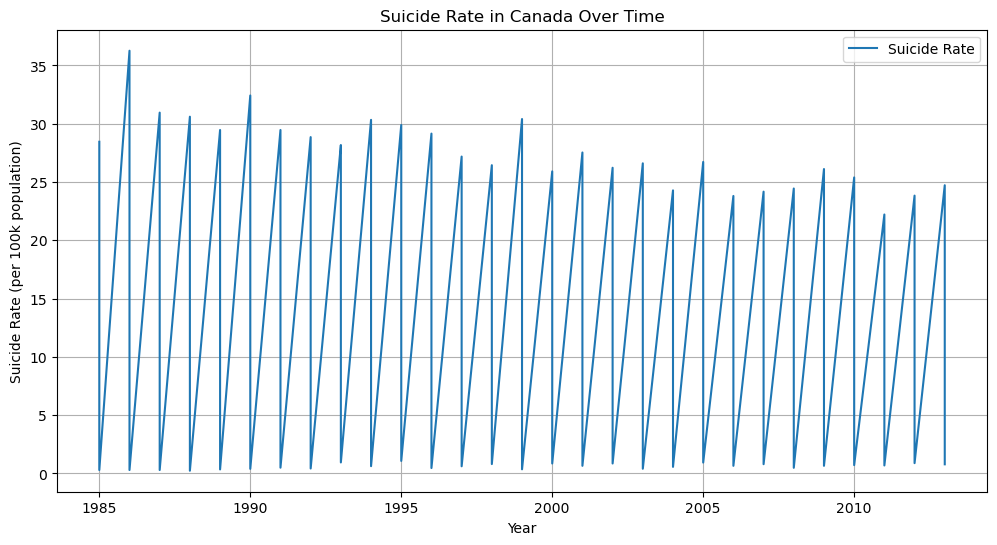

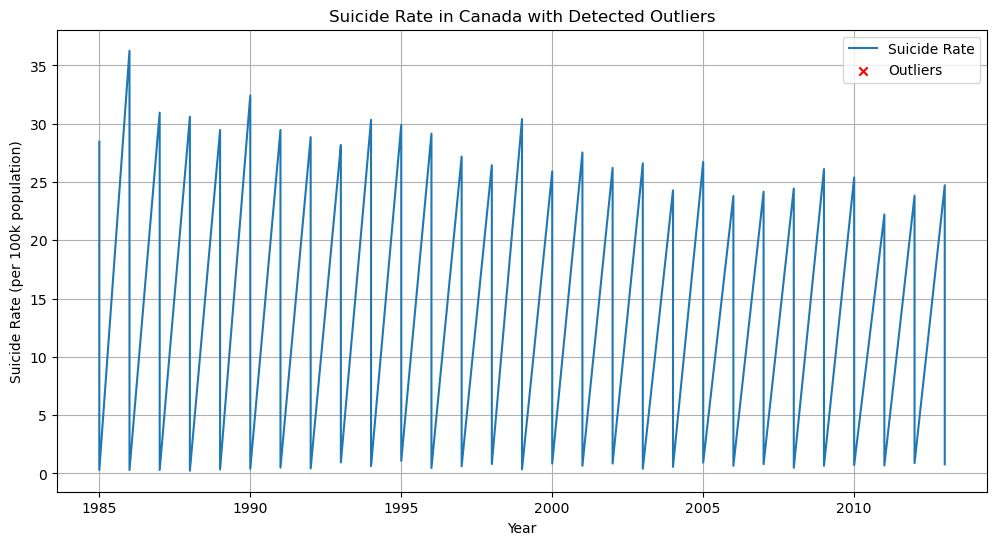

Years with detected outliers:
Series([], Name: year, dtype: int64)


In [103]:
# Perform outlier detection using Z-score
z_scores = np.abs(stats.zscore(suicide_rate))
threshold = 3  # Adjust the threshold as needed
outliers = np.where(z_scores > threshold)[0]

# Identify and visualize outliers
outlier_years = canada_data.iloc[outliers]['year']
outlier_rates = suicide_rate.iloc[outliers]

# Visualize detected outliers
plt.figure(figsize=(12, 6))
plt.plot(canada_data['year'], suicide_rate, label='Suicide Rate')
plt.scatter(outlier_years, outlier_rates, color='red', label='Outliers', marker='x')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Suicide Rate in Canada with Detected Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Print the years with detected outliers
print("Years with detected outliers:")
print(outlier_years)

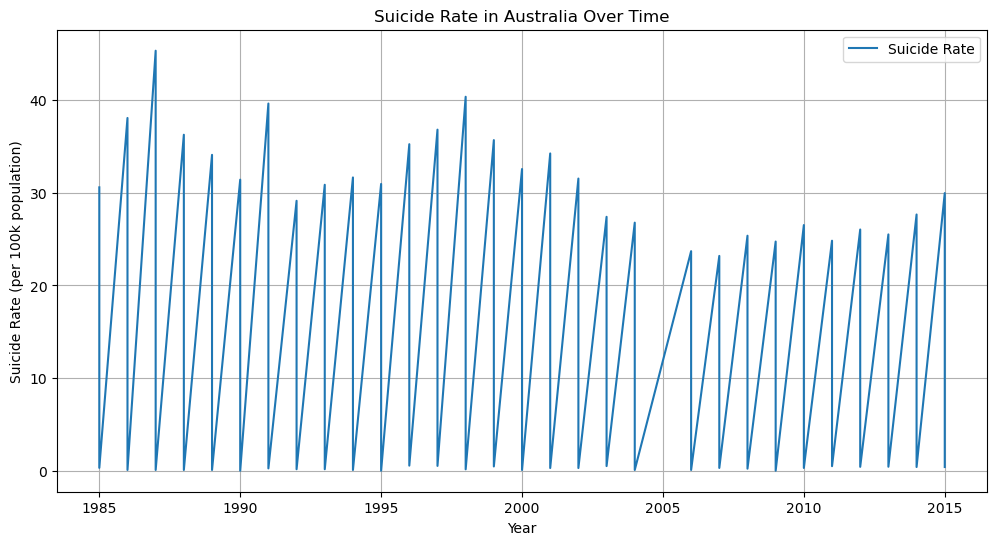

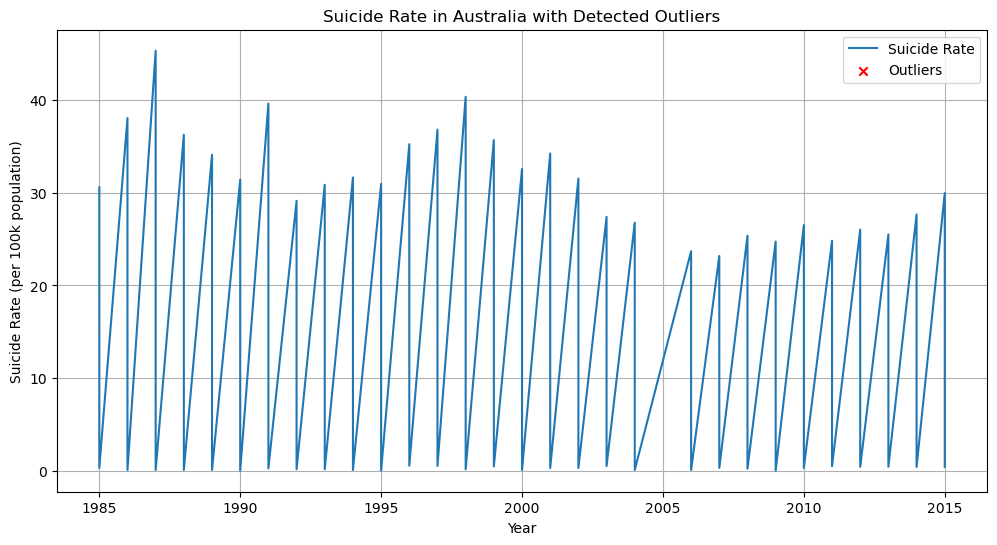

Years with detected outliers:
Series([], Name: year, dtype: int64)


In [104]:
# Outlier detection for Australia as done for Canada above

# Extract suicide rate data
suicide_rate = australia_data['suicides/100k pop']

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(australia_data['year'], suicide_rate, label='Suicide Rate')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Suicide Rate in Australia Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Perform outlier detection using Z-score
z_scores = np.abs(stats.zscore(suicide_rate))
threshold = 3  # Adjust the threshold as needed
outliers = np.where(z_scores > threshold)[0]

# Identify and visualize outliers
outlier_years = australia_data.iloc[outliers]['year']
outlier_rates = suicide_rate.iloc[outliers]

# Visualize detected outliers
plt.figure(figsize=(12, 6))
plt.plot(australia_data['year'], suicide_rate, label='Suicide Rate')
plt.scatter(outlier_years, outlier_rates, color='red', label='Outliers', marker='x')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Suicide Rate in Australia with Detected Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Print the years with detected outliers
print("Years with detected outliers:")
print(outlier_years)